# "뭐? 배달 라이더로 이직을 하겠다고?"

## 목차

 1. 서론</br>
    1-1. 코로나19와 배달산업의 성장</br>
    1-2. 배달 산업의 인력 : 배달 라이더</br>

 2. 본론</br>
    2-1. 배달주문량 분석</br>
        1) 일자별 배달주문량
        2) 배달업종별 주문량
        3) 시간대별 배달주문량
        4) 시도, 지역구별 주문량
        5) 코로나19 확진자수, 사회적 거리두기에 따른 주문량

    2-2. 배달 라이더 수 분석</br>
        1) 배달 라이더 수의 변화
        2) 시도별 배달 라이더 수의 변화
        3) 지역구별 배달 라이더 수의 변화
        4) 배달 라이더 수와 배달주문량 간의 상관관계
    
    2-3. 배달 라이더 수익 분석</br>
        1) 배달요청업체 할당량
        2) 배달시간, 배달금액, 상품금액 간의 상관관계
        3) 사회적 거리두기에 따른 평균 배달시간과 배달금액
        4) 배달 라이더의 수익 측정

 3. 결론</br>
    3-1. 코로나19와 배달산업의 관계</br>
    3-2. 배달 라이더의 실상</br>
    3-3. 한계점 및 아쉬운 점</br>

---


전처리 과정
- 환경 세팅: Google Colab
- 파일 및 활용 라이브러리 업로드

In [1]:
# ================================================================================ #
# =========================== Goolge Colab File Upload =========================== #
# ================================================================================ #

from google.colab import drive
drive.mount('/content/drive')

# # !cp 파일1 파일2 # 파일1을 파일2로 복사 붙여넣기
# !cp "/content/drive/MyDrive/2021_데이터분석스터디/DACON_2021빅데이터통신플랫폼경진대회/datasets.zip" "datasets.zip"

# # data.zip을 현재 디렉터리에 압축해제
# !unzip "datasets.zip"
# !unzip "covid_19_dataset.zip"
# !unzip "KT_빅데이터플랫폼_데이터셋.zip"

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import output
output.clear()

In [ ]:
# import library
import os
import glob
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from tqdm import tqdm, tqdm_notebook
from google.colab import output
import warnings
warnings.filterwarnings(action='ignore')

# csv file download
csv_dir_lst = glob.glob('./*.csv');
df_dict = {}

for dir in tqdm_notebook(csv_dir_lst):
    filename = dir.split("./")[1].split(".")[0]
    try:
        df = pd.read_csv(dir)
    except:
        print("{} : encoding error!", filename)
        df = pd.read_csv(dir, encoding = 'cp949')

    df_dict[filename] = df.copy(...)
    del df

print(df_dict.keys())

df_Policy = df_dict["Policy"]
df_Time = df_dict["Time"]
df_dlvr_call = df_dict["dlvr_call"]


output.clear()



---

# 1. 서론  



## 1-1. 코로나19와 배달산업의 성장

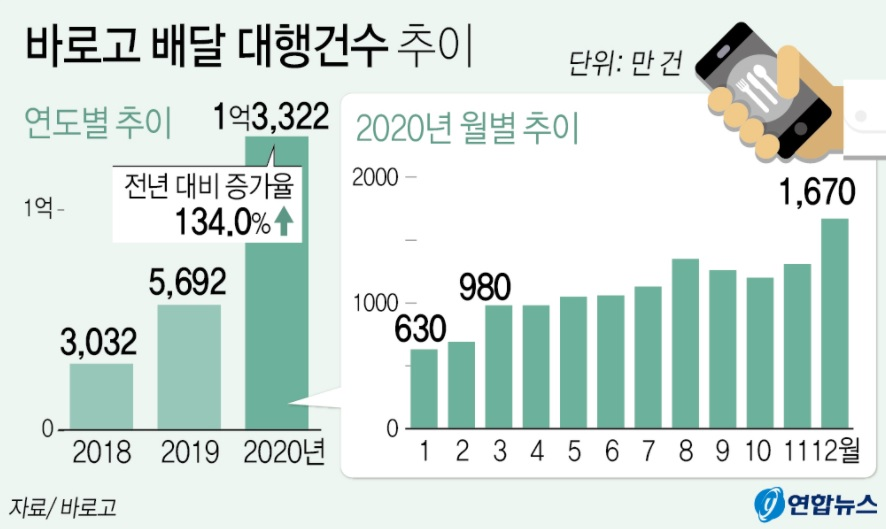

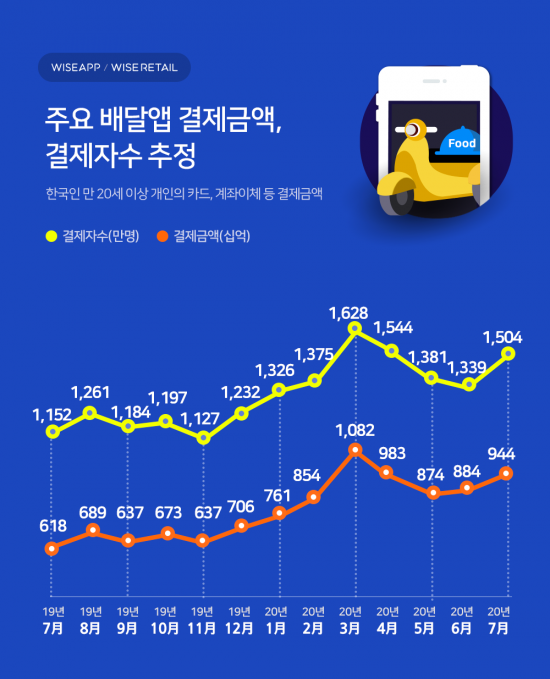

In [ ]:
# !pip install IPython
from IPython.display import Image
image_path = '/content/drive/MyDrive/2021_데이터분석스터디/DACON_2021빅데이터통신플랫폼경진대회/참고자료 및 기사/'
display(Image(f'{image_path}바로고 주문현황.jpg', width=600))
display(Image(f'{image_path}배달앱결제금액, 결제자수.png', height=600))

코로나19(Covid-19)가 발병된 시기 이후인 2020년에 배달플랫폼을 통해 이루어진 '배달 대행 건수'를 살펴본 결과, 배달 대행 건수가 전년대비 134% 증가하고 있는 것으로 나타났습니다. 마찬가지로 배달앱을 이용하는 '결제자수'의 경우에도 코로나19 발병 이후 시간이 지남에 따라 증가하고 있는 것을 살펴볼 수 있었습니다. 우리는 이를 토대로, 실제로 코로나19가 배달시장 성장에 지속적인 영향을 미쳤는지에 대해서 주어진 데이터를 통해 살펴보고자 하였습니다.</br></br>[출처]바로고(위),와이즈앱(아래)

## 1-2. 배달 산업의 인력 : 배달라이더

앞서 언급했던 코로나19가 배달 산업에 미치는 지속적인 영향력의 유무에 대한 분석을 진행하기 위해 탐색적 데이터 분석(EDA:Exploratory Data Analysis)을 진행하는 과정에서 배달 플랫폼의 인력에 해당하는 배달 라이더 또한 배달 산업의 성장과 함께 연관이 있다고 생각이 되어 배달 라이더와 관련된 분석 또한 진행하기로 결정을 하였습니다.

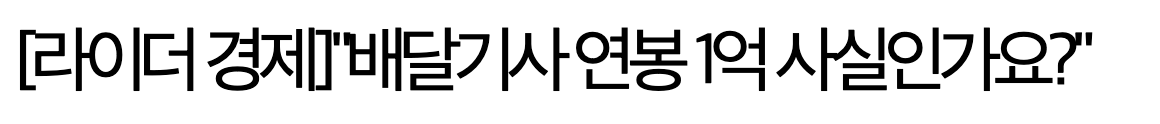

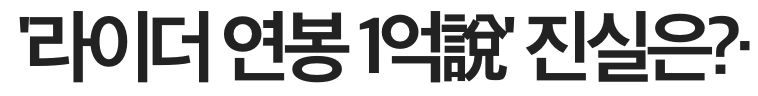

In [ ]:
display(Image(f'{image_path}기사제목1.png', height=40))
display(Image(f'{image_path}기사제목2.png', height=30))

한 번쯤은 배달 라이더를 생계수단으로 삼아 많은 돈을 벌게 되었다는 뉴스기사를 접해보신 적이 있으실 겁니다. 배달산업이 성장하면서 배달라이더들 또한 높은 수익을 창출해 낼 수 있다는 논리인데요. 이로 인해 '라이더 연봉 1억 시대'라는 말까지 생겨난 것을 볼 수 있었습니다. 저희는 배달 산업의 성장과 관련하여 배달라이더 연봉 1억원대가 현실적으로 가능한 일인지 알아보기로 하였습니다.

# 2. EDA과정 



### 1.업종별 주문량

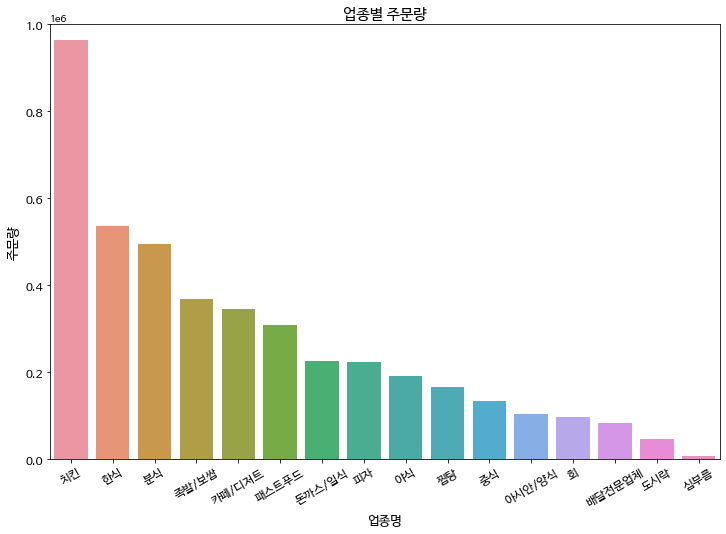

In [ ]:
# 업종별 주문량에 대한 histogram
plt.figure(figsize = (12, 8))
plt.title('업종별 주문량', fontsize = 15)
sns.countplot(x = 'DLVR_STORE_INDUTY_NM', data = df_dlvr_call, order = df_dlvr_call['DLVR_STORE_INDUTY_NM'].value_counts().index[:])
plt.xlabel("업종명", fontsize = 13)
plt.ylabel("주문량", fontsize = 13)
plt.ylim(0, 1000000)
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

### 2.배달시간대별 배달 주문량

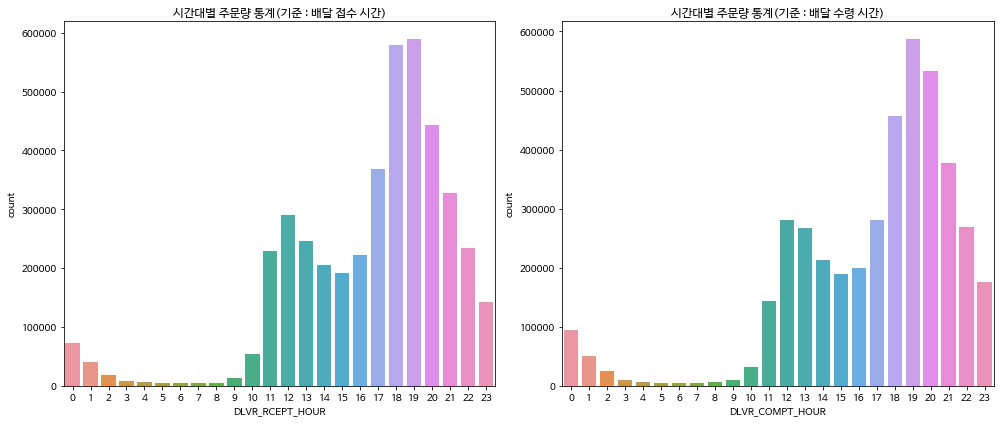

In [ ]:
# 배달시간대별 배달 주문량 관찰
col_time_list = ['DLVR_RCEPT_TIME','DLVR_CARALC_TIME','DLVR_RECPT_TIME','DLVR_COMPT_TIME']
col_time_hour_list = ['DLVR_RCEPT_HOUR','DLVR_CARALC_HOUR', 'DLVR_RECPT_HOUR','DLVR_COMPT_HOUR']

dlvr_call_day_cycle = df_dlvr_call.copy(...)
dlvr_call_day_cycle.replace(r'\N', np.nan, inplace=True)

for col1, col2 in zip(col_time_list, col_time_hour_list):
    dlvr_call_day_cycle[col1] = pd.to_datetime(dlvr_call_day_cycle[col1])
    dlvr_call_day_cycle[col2] = dlvr_call_day_cycle[col1].dt.hour

fig, axs = plt.subplots(figsize=(14, 6), ncols=2)
sns.countplot(dlvr_call_day_cycle['DLVR_RCEPT_HOUR'], ax=axs[0])
sns.countplot(dlvr_call_day_cycle['DLVR_COMPT_HOUR'], ax=axs[1])

axs[0].set_xticklabels(np.arange(0, 24, 1))
axs[1].set_xticklabels(np.arange(0, 24, 1))

axs[0].set_title("시간대별 주문량 통계(기준 : 배달 접수 시간)")
axs[1].set_title("시간대별 주문량 통계(기준 : 배달 수령 시간)")

plt.tight_layout()
plt.show()

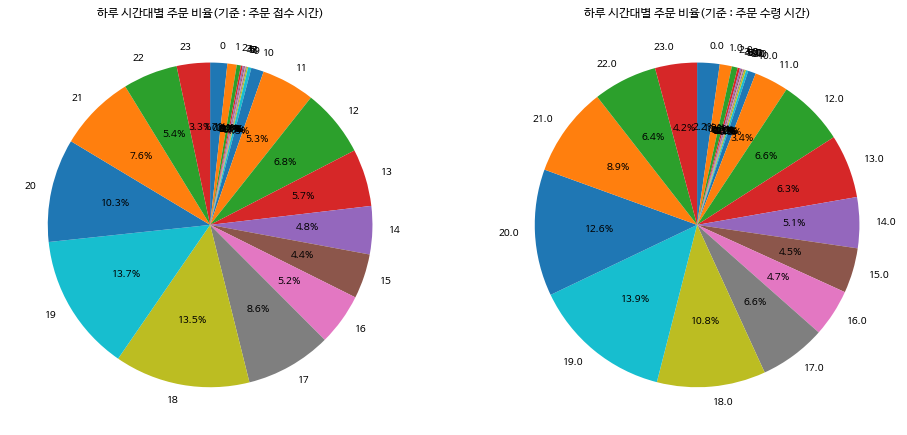

In [ ]:
pie_data_rcept = dlvr_call_day_cycle['DLVR_RCEPT_HOUR'].value_counts(normalize=True).sort_index()*100
pie_data_compt = dlvr_call_day_cycle['DLVR_COMPT_HOUR'].value_counts(normalize=True).sort_index()*100

fig = plt.figure(figsize = (16,12))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title("하루 시간대별 주문 비율(기준 : 주문 접수 시간)")
ax1.pie(pie_data_rcept.values, labels = pie_data_rcept.index, startangle=90, counterclock=False,
        shadow = False, rotatelabels = False, autopct='%1.1f%%')

ax2.set_title("하루 시간대별 주문 비율(기준 : 주문 수령 시간)")
ax2.pie(pie_data_compt.values, labels = pie_data_compt.index, startangle=90, counterclock=False,
        shadow = False, rotatelabels = False, autopct='%1.1f%%')
plt.show()

* 배달 음식 주문 시간대 : 점심, 저녁

* 저녁시간대의 높은 주문량 : 상대적으로 점심보다 저녁시간대의 주문량이 2배정도 높은것으로 보아, 배달 라이더가 점심보다는 저녁시간에 바쁘다는 것을 알 수 있습니다.

### 3.지역별 주문량 : 지도 시각화

In [ ]:
# 지도 시각화
# folium 라이브러리 이용
!pip install folium
output.clear()

import json
kor_geojs_path = '/content/drive/MyDrive/2021_데이터분석스터디/DACON_2021빅데이터통신플랫폼경진대회/kor_geo_signgu.json'
kor_geojs = json.load(open(kor_geojs_path, encoding = 'utf-8'))

# kor_geojs 파일 내 지역구 이름을 구 단위로 수정(경기도는 시 단위로)
for idx, feature in enumerate(kor_geojs['features']):
    local_name = feature['properties']['SIG_KOR_NM']

    if local_name[0:3] == '고양시':
        local_name = local_name[0:3]
    elif len(local_name.split()) > 1:
        local_name = local_name.split()[0]
    elif local_name[0:3] == '용인시':
        local_name = local_name[0:3]
    elif local_name[0:3] == '안양시':
        local_name = local_name[0:3]

    kor_geojs['features'][idx]['properties']['SIG_KOR_NM'] = local_name


local_list = []
for idx, feature in enumerate(kor_geojs['features']):
    local_list.append(feature['properties']['SIG_KOR_NM'])

local_list = np.array(local_list)

df_dlvr_call.PROCESS_DT = pd.to_datetime(df_dlvr_call.PROCESS_DT)
df_dlvr_call_ = df_dlvr_call.copy(...)
df_dlvr_call_.PROCESS_DT = df_dlvr_call.PROCESS_DT.dt.month
df_dlvr_call_ = df_dlvr_call_[(df_dlvr_call_['DLVR_DSTN_BRTC_NM'] == '서울특별시') | 
                              (df_dlvr_call_['DLVR_DSTN_BRTC_NM'] == '경기도') ]

def city_preprocess(text):
    return text.split()[0]

df_dlvr_call_['DLVR_DSTN_SIGNGU_NM'] = df_dlvr_call_['DLVR_DSTN_SIGNGU_NM'].apply(lambda x : city_preprocess(x))

In [ ]:
# 서울 지역만 따로 보자
import folium

dlvr_call_month_list = []
month_list = [12,1,2,3,4,5]
folium_list = []

for month in tqdm_notebook(month_list):
    
    dlvr_call_month = df_dlvr_call_[df_dlvr_call.PROCESS_DT.apply(lambda x : x.month) == month]
    dlvr_call_month = dlvr_call_month[(dlvr_call_month['DLVR_DSTN_BRTC_NM'] == '서울특별시')]
    dlvr_call_group = dlvr_call_month.groupby('DLVR_DSTN_SIGNGU_NM')

    code_list = []
    city_list = []
    signgu_list = []
    legaldong_list = []
    dlvr_num_list = []

    # key : adstrd_code
    for key, group in dlvr_call_group:

        dlvr_num = len(group) / 1000
        city = group.DLVR_DSTN_BRTC_NM.iloc[0]
        signgu = group.DLVR_DSTN_SIGNGU_NM.iloc[0]

        dlvr_num_list.append(dlvr_num)
        city_list.append(city)
        signgu_list.append(signgu)

    row_data = {
        'DLVR_DSTN_BRTC_NM' : city_list,
        'DLVR_DSTN_SIGNGU_NM':signgu_list,
        'DLVR_NUM' : dlvr_num_list,
    }

    dlvr_call_month_ = pd.DataFrame(row_data).iloc[0:-1]
    dlvr_call_month_list.append(dlvr_call_month_)

    dlvr_call_map = folium.Map(location=[37.5502, 126.982], zoom_start = 11)

    folium.Choropleth(
        geo_data= kor_geojs,
        data = dlvr_call_month_,
        columns=('DLVR_DSTN_SIGNGU_NM', 'DLVR_NUM'),
        key_on='feature.properties.SIG_KOR_NM',
        fill_color = 'YlGnBu',
        fill_opacity = 0.7,
        line_opacity = 0.2,
        nan_fill_color = 'white',
        legend_name= str(month) + '월 지역별 주문수(1000 단위)',
    ).add_to(dlvr_call_map)
    
    dlvr_call_map
    f = folium.Figure(width = 800, height = 600, title = str(month) + '월 지역별 주문량')
    f.add_child(dlvr_call_map)
    folium_list.append(f)

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
display(folium_list[0])
display(folium_list[1])
display(folium_list[2])
display(folium_list[3])
display(folium_list[4])
display(folium_list[5])

Output hidden; open in https://colab.research.google.com to view.



* 지도 시각화를 통한 지역별 주문량을 파악해본 결과 월 지역별 주문량의 차이는 뚜렷하게 나타나지 않았습니다.

### 4.월별 지역구 주문량 변화

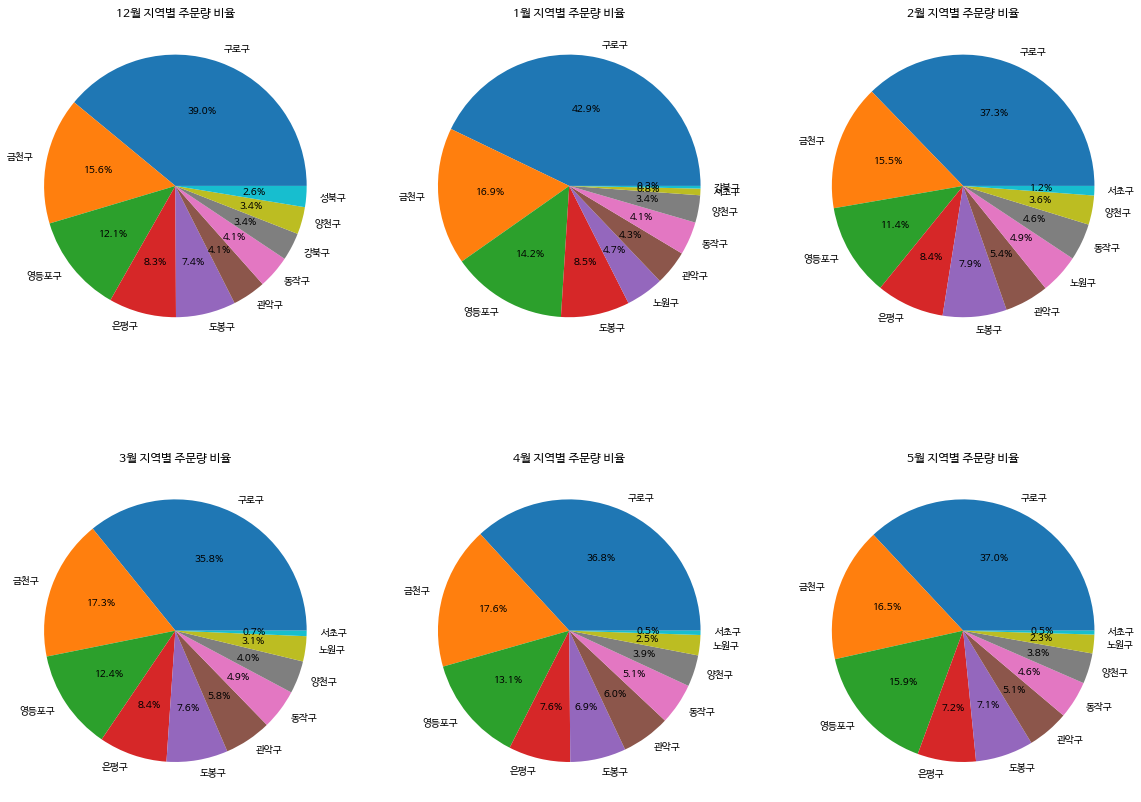

In [ ]:
# 원형 차트로 월별 지역구 주문량 변화 관찰
month_list = [12,1,2,3,4,5,6]
fig = plt.figure(figsize = (20,15))
for i in range(0,6):
    ax = fig.add_subplot(2,3,i + 1)
    ax.set_title(str(month_list[i]) + "월 지역별 주문량 비율")
    data = dlvr_call_month_list[i].DLVR_NUM.sort_values(ascending = False)
    pie_data = data.values[0:10] * 100
    pie_label = dlvr_call_month_list[i].DLVR_DSTN_SIGNGU_NM[data.index[0:10]]
    ax.pie(pie_data, labels = pie_label, shadow = False, rotatelabels = False, autopct='%1.1f%%')

plt.show()

* 원형차트 시각화를 통해 월별, 지역별 주문량 비율을 살펴본 결과, 서울의 경우 구로구의 주문량이 가장 많았고, 금천구, 영등포구 순으로 주문량이 높다는 것을 알 수 있었습니다.

### 5.배달업종별 주문금액

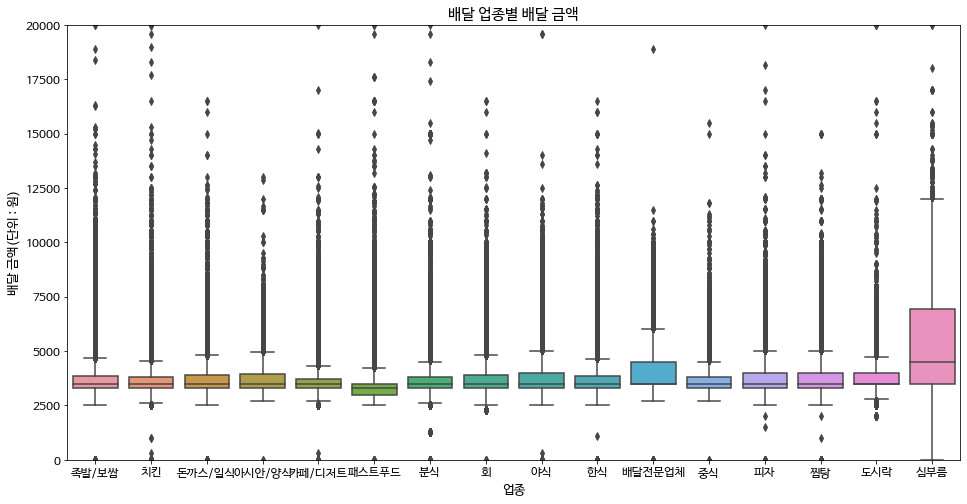

In [ ]:
# 배달 업종별 배달 금액 boxplot
dlvr_call_amount = df_dlvr_call[['PROCESS_DT', 'DLVR_STORE_INDUTY_NM','DLVR_AMOUNT']]

plt.figure(figsize = (16, 8))
plt.title("배달 업종별 배달 금액", fontsize = 15)
sns.boxplot(x = 'DLVR_STORE_INDUTY_NM', y = 'DLVR_AMOUNT', data = dlvr_call_amount)
plt.xlabel("업종", fontsize = 13)
plt.ylabel("배달 금액(단위 : 원)", fontsize = 13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0, 20000)
plt.show()

# 2. 본론  



## 2-1. 코로나19와 배달주문량

### **1) 비교 시점 설정**

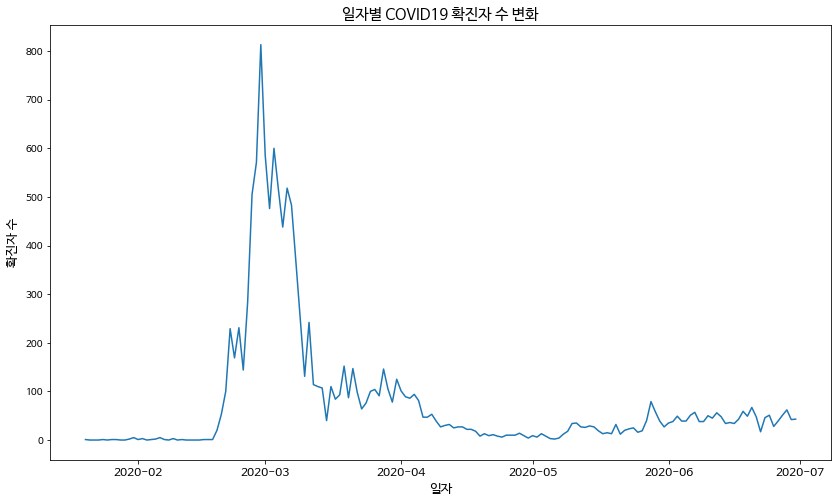

In [ ]:
# 코로나 확진자수 : 일자에 따른 변화 추이 분석
# interval 
df_Time['lag'] = df_Time['confirmed'].shift(1)
df_Time['lag'] = df_Time['lag'].fillna(0)
df_Time['lag'].isna().sum()
df_Time['cnt'] = df_Time['confirmed'] - df_Time['lag']

# str to datetime
df_Time['date'] = df_Time['date'].map(lambda x : datetime.strptime(str(x),'%Y-%m-%d') )

plt.figure(figsize = (14,8))
plt.title("일자별 COVID19 확진자 수 변화", fontsize = 15)
plt.plot(df_Time['date'], df_Time['cnt'])
plt.xlabel('일자', fontsize = 13)
plt.ylabel('확진자 수', fontsize = 13)
plt.xticks(fontsize = 12)
plt.show()

,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-02-29,2020-03-21
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05
31,32,Korea,Social,Social Distancing Campaign,Weak(1st),2020-05-06,NaN


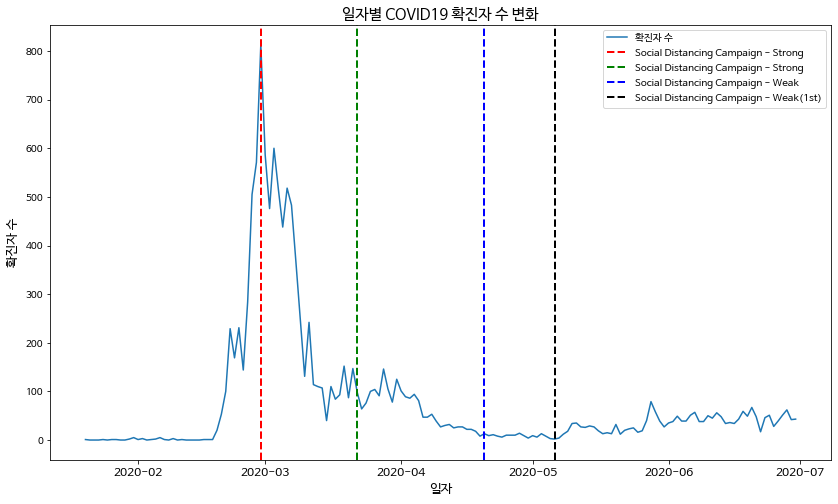

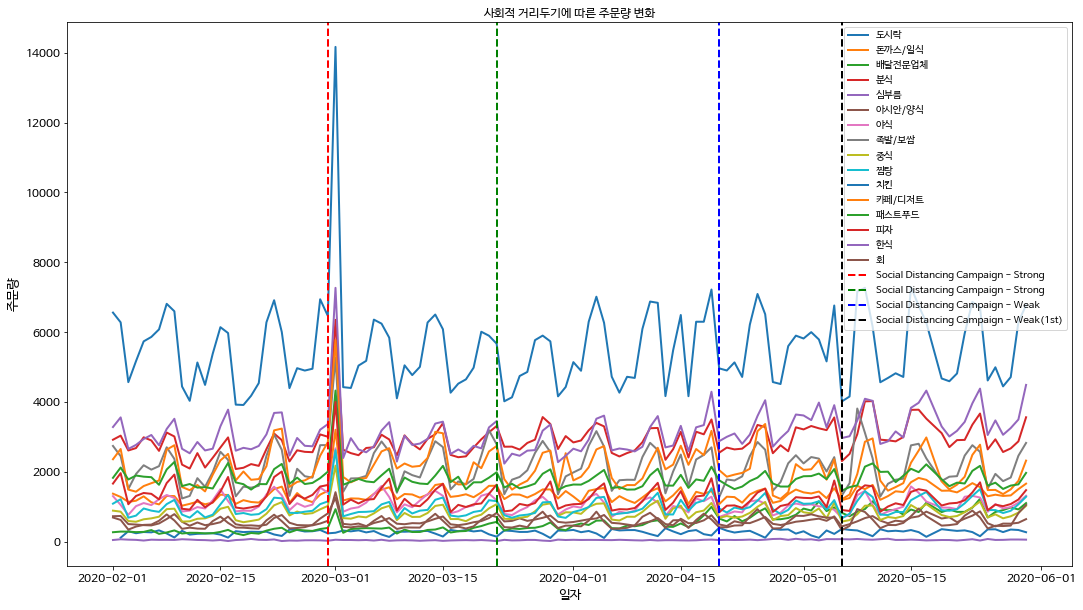

In [ ]:
# 거리두기 단계에 따른 주문량 / 확진자 수 변화 비교
# 사회적 거리두기 캠페인 : 2020년 3월 1일부터 발령
groupby_gov_policy = df_Policy.groupby(by = ['gov_policy'])

dlvr_store_groupby = df_dlvr_call.groupby(by = ['DLVR_STORE_INDUTY_NM'])
social_distancing_campaign = groupby_gov_policy.get_group('Social Distancing Campaign')
display(social_distancing_campaign)
print('\n\n')

# 날짜 데이터
date_index = dlvr_store_groupby.get_group('치킨')['PROCESS_DT'].value_counts().sort_index(axis = 0).keys()

from datetime import datetime
social_distancing_campaign['start_date'] = social_distancing_campaign['start_date'].map(lambda x : datetime.strptime(str(x),'%Y-%m-%d') )

# 사회적 거리두기 발령에 따른 확진자 수

plt.figure(4, figsize = (14,8))
plt.title("일자별 COVID19 확진자 수 변화", fontsize = 15)
plt.plot(df_Time['date'], df_Time['cnt'], label = '확진자 수')
plt.xlabel('일자', fontsize = 13)
plt.ylabel('확진자 수', fontsize = 13)
plt.xticks(fontsize = 12)

plt.figure(4)

color_list = ['r', 'g', 'b','k']
for i, start_date in enumerate(social_distancing_campaign['start_date']):
    detail = social_distancing_campaign['detail'].iloc[i]
    plt.axvline(x = start_date, c = color_list[i], linestyle = '--', linewidth = 2, label = 'Social Distancing Campaign - ' + detail)
plt.legend(loc = 'upper right')
plt.show()
print('\n\n')

plt.figure(3, figsize = (18,10))
plt.title("사회적 거리두기에 따른 주문량 변화")

day_from = '2020-02-01'
day_to = '2020-05-30'

idx_from = np.argmax(date_index == day_from)
idx_to = np.argmax(date_index == day_to)

for key, item in dlvr_store_groupby:
    dlvr_key = dlvr_store_groupby.get_group(key)
    num_selled = dlvr_key["PROCESS_DT"].value_counts().sort_index(axis = 0)[idx_from : -1]
    plt.plot(num_selled.keys(), num_selled.values, label = key, linestyle = '-', linewidth = 2)
    
plt.ylabel("주문량",fontsize = 13)
plt.xlabel("일자", fontsize = 13)
plt.legend(loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.figure(3)

for i, start_date in enumerate(social_distancing_campaign['start_date']):
    detail = social_distancing_campaign['detail'].iloc[i]
    plt.axvline(x = start_date, c = color_list[i], linestyle = '--', linewidth = 2, label = 'Social Distancing Campaign - ' + detail)

plt.legend(loc = 'upper right')
plt.show()

### **2) 코로나19와 일자별 배달주문량**

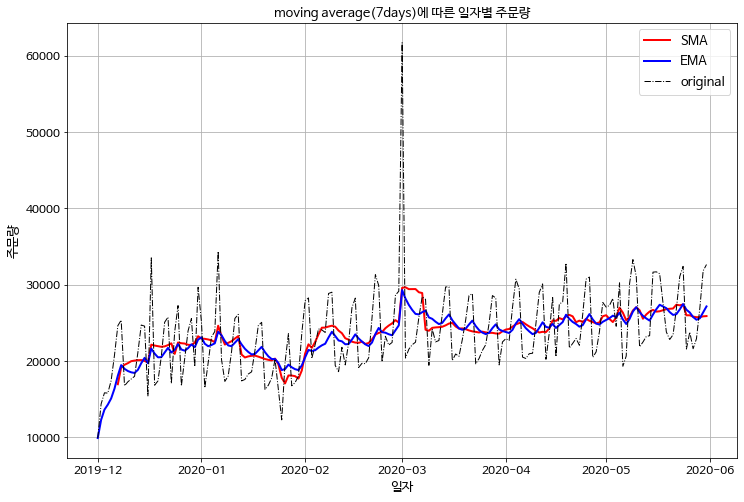

In [ ]:
# 7일 간격으로 moving average를 이용해 smoothing curve에 대한 분석을 진행
# moving average : simple moving average / exponetial moving average 

df_dlvr_call['PROCESS_DT'] = pd.to_datetime(df_dlvr_call['PROCESS_DT'])

dlvr_call_sma_7days = df_dlvr_call["PROCESS_DT"].value_counts().sort_index(axis = 0).rolling(7).mean().dropna()
dlvr_call_ema_7days = df_dlvr_call["PROCESS_DT"].value_counts().sort_index(axis = 0).ewm(7).mean().dropna()
dlvr_call_non = df_dlvr_call["PROCESS_DT"].value_counts().sort_index(axis = 0)

plt.figure(figsize = (12,8))
plt.title("moving average(7days)에 따른 일자별 주문량", fontsize = 13)

plt.plot(dlvr_call_sma_7days.keys(), dlvr_call_sma_7days.values, label = 'SMA', C = 'r',linestyle = '-', linewidth = 2)
plt.plot(dlvr_call_ema_7days.keys(), dlvr_call_ema_7days.values, label = 'EMA', C = 'b',linestyle = '-', linewidth = 2)
plt.plot(dlvr_call_non.keys(), dlvr_call_non.values, label = 'original', c = 'k', linestyle = '-.', linewidth = 1)

plt.ylabel("주문량", fontsize = 13)
plt.xlabel("일자", fontsize = 13)
plt.legend(fontsize = 13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.show()

먼저, 일자별 배달주문량의 변화추이를 살펴본 결과 다음과 같은 사실을 발견할 수 있었습니다.

* 7일 주기로 반복되는 주기성 : 이는 배달 서비스를 이용하는 소비자들의 소비패턴이 주중과 주말에 차이가 있기 때문입니다. 저희는 이러한 주기성을 제거한 주문량 변화 추이를 살펴보기 위해 이동평균(Moving Average)을 적용해보았습니다.

* 3월 이후 주문량 증가 : 3월 이후 확진자수가 급증하였고, 2020년 03월 01일의 경우 강화된 사회적 거리두기와 휴일의 영향을 배달 주문이 폭등한 것으로 해석해 볼 수 있습니다.



### **3) 코로나19와 배달업종별 주문량/주문금액**

In [ ]:
# dlvr data preprocessing
# PROCESS_DT : sort + convert to datetime

df_dlvr_call = df_dlvr_call.sort_values(by = ['PROCESS_DT'])

# groupby 배달 업종
dlvr_store_groupby = df_dlvr_call.groupby(by = ['DLVR_STORE_INDUTY_NM'])

plt.figure(2, figsize = (18,9))
plt.title("일자별 배달음식 주문량 변화", fontsize = 15)

for key, item in dlvr_store_groupby:
    dlvr_key = dlvr_store_groupby.get_group(key)
    num_selled = dlvr_key["PROCESS_DT"].value_counts().sort_index(axis = 0)
    plt.plot(num_selled.keys(), num_selled.values, label = key, linestyle = '-.', linewidth = 2)
    
plt.ylabel("주문량", fontsize = 14)
plt.xlabel("일자", fontsize = 14)
plt.legend()
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# num_selled.keys()는 날짜 인덱스로 사용 예정
date_index = num_selled.keys()

In [ ]:
# 배달 주문 금액
dlvr_call_amount = df_dlvr_call[['PROCESS_DT', 'DLVR_STORE_INDUTY_NM','DLVR_AMOUNT']]
dlvr_call_amount_group = dlvr_call_amount.groupby(['PROCESS_DT','DLVR_STORE_INDUTY_NM']).agg({'DLVR_AMOUNT' : np.sum}).unstack()
dlvr_call_amount_group.columns = [b for a, b in dlvr_call_amount_group.columns]
dlvr_call_amount_group.plot(kind = 'line', figsize = (20,10)).get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel("일자", fontsize = 13)
plt.ylabel("일별 총 주문 금액",fontsize = 13)
plt.title('일자에 따른 업종별 주문 금액', fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

### **4) 코로나19와 시도, 지역구별 주문량**

데이터에 반영된 광역시 : ['경기도' '서울특별시']
데이터에 반영된 시군구명 : ['강남구' '강동구' '강북구' '강서구' '고양시 덕양구' '고양시 일산동구' '고양시 일산서구' '관악구' '광명시' '광주시'
 '구로구' '구리시' '금천구' '김포시' '남양주시' '노원구' '도봉구' '동대문구' '동두천시' '동작구' '부천시'
 '서대문구' '서초구' '성남시 수정구' '성남시 중원구' '성북구' '송파구' '수원시 권선구' '수원시 장안구'
 '수원시 팔달구' '시흥시' '안산시 단원구' '안산시 상록구' '안양시 동안구' '안양시 만안구' '양주시' '양천구' '양평군'
 '여주시' '연천군' '영등포구' '오산시' '용인시 처인구' '은평구' '의정부시' '이천시' '중랑구' '파주시' '평택시'
 '포천시' '하남시' '화성시']


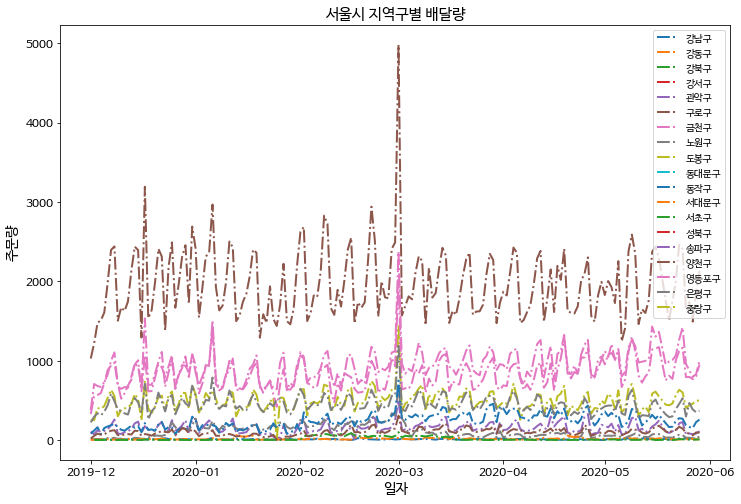

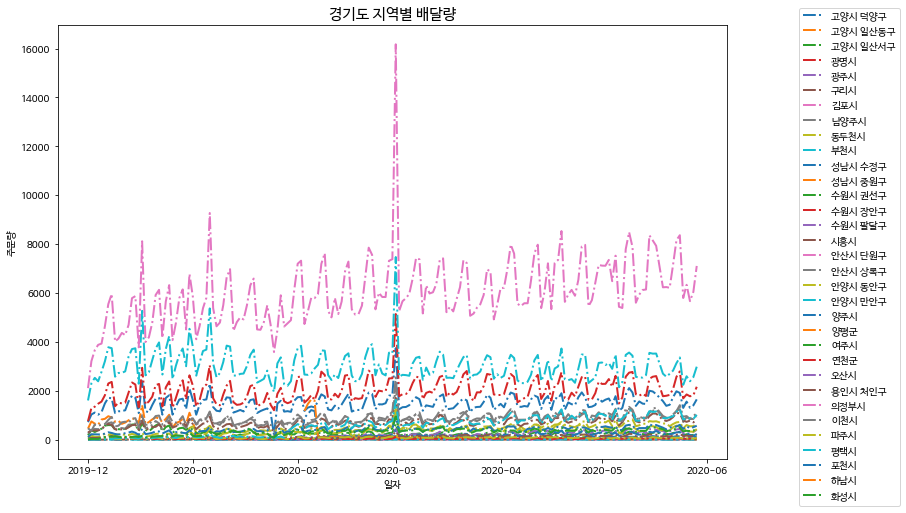

In [ ]:
# 지역구에 따른 월별 주문량 분석
# 지역별 영향력을 파악해보자
# 배달 목적지 : '광역시도명'에 따른 배달 음식 수요 변화 관찰
# 지도 시각화와 원형 차트를 통해 월별 지역구 배달 수요의 변화를 관찰해보자

print("데이터에 반영된 광역시 : {}".format(np.unique(df_dlvr_call['DLVR_STORE_BRTC_NM'].values)))
print("데이터에 반영된 시군구명 : {}".format(np.unique(df_dlvr_call['DLVR_STORE_SIGNGU_NM'].values)))

dlvr_store_groupby = df_dlvr_call.groupby(by = ['DLVR_STORE_INDUTY_NM'])

dlvr_store_seoul = df_dlvr_call[df_dlvr_call['DLVR_STORE_BRTC_NM'] == '서울특별시']
dlvr_store_other = df_dlvr_call[df_dlvr_call['DLVR_STORE_BRTC_NM'] == '경기도']

seoul_groupby = dlvr_store_seoul.groupby(by = ['DLVR_STORE_SIGNGU_NM'])
other_groupby = dlvr_store_other.groupby(by = ['DLVR_STORE_SIGNGU_NM'])

# seoul
plt.figure(figsize = (12,8))
plt.title("서울시 지역구별 배달량", fontsize = 15)

for key, item in seoul_groupby:
    dlvr_key = seoul_groupby.get_group(key)
    num_selled = dlvr_key['PROCESS_DT'].value_counts().sort_index(axis = 0)
    date_index = num_selled.keys()

    # 구간 결정
    idx_from = 0
    idx_to = np.argmax(date_index == '2020-05-30')

    num_selled = num_selled[idx_from : idx_to]
    plt.plot(num_selled.keys(), num_selled.values, label = key, linestyle = '-.', linewidth = 2)

plt.ylabel("주문량", fontsize = 14)
plt.xlabel("일자", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 'upper right')
plt.show()
print('\n\n')

# 경기도
fig = plt.figure(figsize = (12,8))
ax = plt.subplot(111)

ax.set_title("경기도 지역별 배달량", fontsize = 15)
for key, item in other_groupby:
    dlvr_key = other_groupby.get_group(key)
    num_selled = dlvr_key['PROCESS_DT'].value_counts().sort_index(axis = 0)
    date_index = num_selled.keys()

    # 구간 결정
    idx_from = 0
    idx_to = np.argmax(date_index == '2020-05-30')

    num_selled = num_selled[idx_from : idx_to]
    ax.plot(num_selled.keys(), num_selled.values, label = key, linestyle = '-.', linewidth = 2)

ax.set_ylabel("주문량")
ax.set_xlabel("일자")
ax.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

* 일자별 주문량과 동일한 패턴 : 서울과 경기도 지역별 주문량을 살펴본 결과 앞서 보여드렸던 일자별 주문량과 동일한 패턴이 발견되었습니다.</br>
이는 지역별로 배달 패턴의 특이성이 발견되지 않음을 알 수 있습니다.

### **5) 코로나19 확진자수와 배달 주문량**

In [ ]:
# 배달 데이터 중 주문 승인된 배달에 대해 상관관계 분석
# 분석 대상은 각 업종별 배달량과 확진자 수의 관계
dlvr_call_req = df_dlvr_call[df_dlvr_call['DLVR_REQUST_STTUS_VALUE'] == 1]
dlvr_call_sel = dlvr_call_req[['PROCESS_DT','DLVR_STORE_INDUTY_NM']]
dlvr_call_all = dlvr_call_sel.copy(...)

dlvr_call_all_grp = dlvr_call_all.groupby(['PROCESS_DT'])['DLVR_STORE_INDUTY_NM'].value_counts()
dlvr_call_all_grp_df = pd.DataFrame(dlvr_call_all_grp)

dlvr_call_unstack = dlvr_call_all_grp_df.unstack()
dlvr_call_unstack_1 = dlvr_call_unstack.reset_index()
dlvr_call_unstack_1

t_join = pd.merge(dlvr_call_unstack_1, df_Time, left_on = 'PROCESS_DT', right_on = 'date', how = 'left')
t_join_cut = t_join[t_join['date'] >= '2020-01-20']
t_join_cut= t_join_cut.astype({'cnt' : 'int'})
t_join_cut_1 = t_join_cut[[('DLVR_STORE_INDUTY_NM', '도시락'), ('DLVR_STORE_INDUTY_NM', '돈까스/일식'), ('DLVR_STORE_INDUTY_NM', '배달전문업체'), ('DLVR_STORE_INDUTY_NM', '분식'),('DLVR_STORE_INDUTY_NM', '심부름'),
                           ('DLVR_STORE_INDUTY_NM', '아시안/양식'),('DLVR_STORE_INDUTY_NM', '야식'),('DLVR_STORE_INDUTY_NM', '족발/보쌈'),('DLVR_STORE_INDUTY_NM', '중식'),('DLVR_STORE_INDUTY_NM', '찜탕'),
                           ('DLVR_STORE_INDUTY_NM', '치킨'),('DLVR_STORE_INDUTY_NM', '패스트푸드'),('DLVR_STORE_INDUTY_NM', '피자'),('DLVR_STORE_INDUTY_NM', '한식'),('DLVR_STORE_INDUTY_NM', '회'), 'cnt']]

t_join_cut_cor = t_join_cut_1.corr(method = 'pearson')
t_join_cut_cor['cnt']

(DLVR_STORE_INDUTY_NM, 도시락)       0.077526
(DLVR_STORE_INDUTY_NM, 돈까스/일식)    0.236243
(DLVR_STORE_INDUTY_NM, 배달전문업체)   -0.173988
(DLVR_STORE_INDUTY_NM, 분식)        0.161624
(DLVR_STORE_INDUTY_NM, 심부름)      -0.201993
(DLVR_STORE_INDUTY_NM, 아시안/양식)    0.119940
(DLVR_STORE_INDUTY_NM, 야식)        0.364023
(DLVR_STORE_INDUTY_NM, 족발/보쌈)     0.236024
(DLVR_STORE_INDUTY_NM, 중식)        0.252975
(DLVR_STORE_INDUTY_NM, 찜탕)        0.141560
(DLVR_STORE_INDUTY_NM, 치킨)        0.216322
(DLVR_STORE_INDUTY_NM, 패스트푸드)     0.263550
(DLVR_STORE_INDUTY_NM, 피자)        0.276680
(DLVR_STORE_INDUTY_NM, 한식)        0.092699
(DLVR_STORE_INDUTY_NM, 회)         0.103681
cnt                               1.000000
Name: cnt, dtype: float64

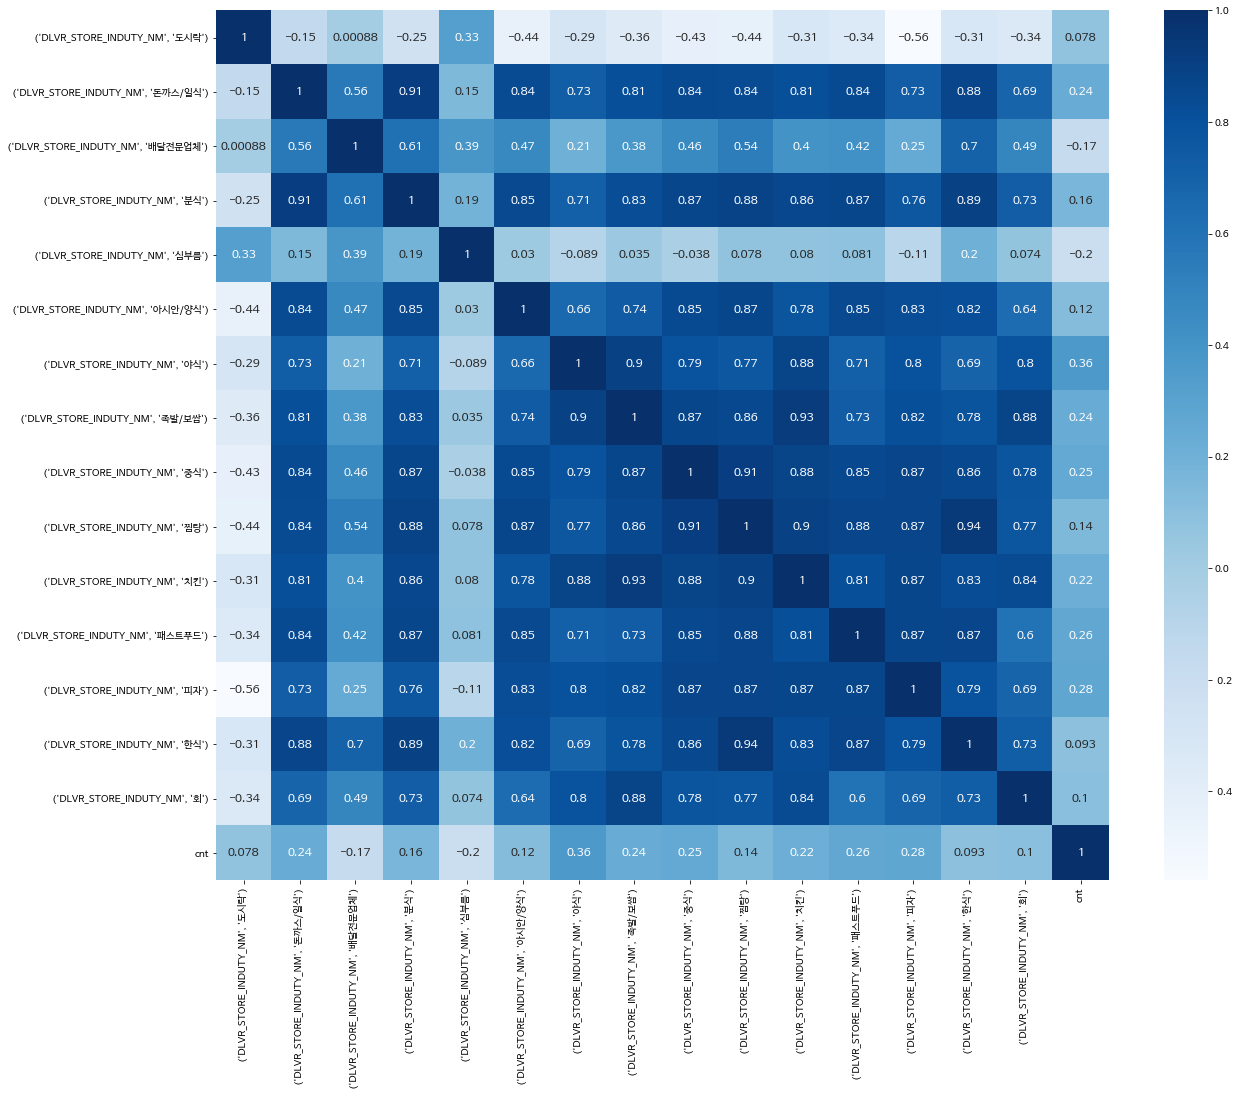

In [ ]:
plt.figure(figsize = (20,16))
cor_ax = sns.heatmap(t_join_cut_cor, annot = True, cmap = 'Blues', annot_kws={'fontsize': 12})
plt.show()

확진자수와 배달 업종 별 상관관계를 파악해보는 과정에서 코로나19 확진자수와 배달주문량과는 상관관계가 없는 것으로 나타났습니다.</br> 이는 코로나19 확진자수의 증가가 배달 산업의 성장에 영향을 끼치는 요인이라고 보기는 어렵다고 볼 수 있습니다.

-  결과 정리

저희는 코로나19가 배달 산업 성장에 어떤 영향을 미치고 있는지를 알아보고자</br>코로나19와 사회적 거리두기 단계 이 두 가지 요소를 함께 고려하여 배달 주문량의 변화를 살펴보았습니다.</br></br>먼저, 확진자수가 급증했던 2020년 03월 01자에 주문량이 평소보다 급증한 것을 발견할 수 있었습니다.</br> 이는 확진자수의 급증이 주문량에 어느 정도 영향을 미쳤다고 볼 수 있습니다.</br></br>다음으로 사회적 거리두기 단계에 따른 주문량을 살펴본 결과, 사회적 거리두기 단계와 배달 주문량은 관계가 없는 것으로 나타났습니다.</br> 이러한 결과는 갑작스럽게 코로나19 확진자 수가 급증하면서 사람들은 '불안함'을 느끼게 되었고 </br>이로 인해 평소보다 더 많은 배달 주문량이 나타났나고 볼 수 있습니다.</br> 하지만 이후에는 점차적으로 평소와 같은 배달 주문량이 나타난 것으로 보아 사회적거리두기에 따른 배달주문량의 변화가 나타나지는 않은 것으로 볼 수 있습니다.

## 2-2. 배달 라이더 수 분석



저희는 여태까지 보여드린 EDA과정을 통해 코로나19와 배달산업 성장과의 연관성을 파악하는 과정에서 앞서 말씀드렸다시피 배달산업을 이루고 있는 하나의 요소인 '배달라이더'에 대한 심층적인 분석을 통해 배달라이더의 실상에 대해 파헤쳐보고자 했습니다.

### **1) 배달 라이더 수의 변화**

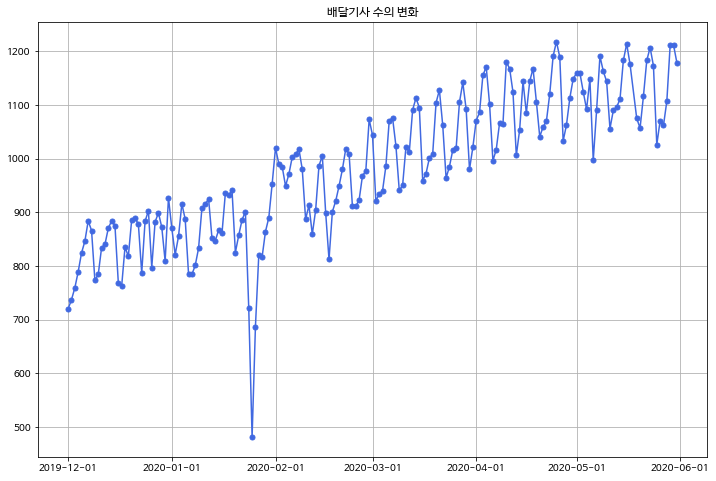




DLVR_MAN_ID    481
Name: 2020-01-25 00:00:00, dtype: int64


In [ ]:
# 배달기사의 수 추세 관찰
# 2019년 12월 - 2020년 5월 사이로 배달 주문이 할당된 배달 기사의 ID를 기준으로 분석

import matplotlib.dates as md

dlvr_call_rider_date = pd.DataFrame(df_dlvr_call.groupby(['PROCESS_DT'])['DLVR_MAN_ID'].nunique())
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(dlvr_call_rider_date, marker='o', ms=5, color='royalblue')
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)

ax.set_title('배달기사 수의 변화')
ax.grid()
plt.show()

print('\n\n')
print(dlvr_call_rider_date.iloc[dlvr_call_rider_date['DLVR_MAN_ID'].argmin()])

배달 라이더 수의 변화를 살펴본 결과 다음과 같은 사실을 발견할 수 있었습니다.</br></br>

- 배달 라이더수의 지속적인 증가 : 시각화를 통해 살펴본 결과 설연휴에 해당하는 2020년 01월 25일을 제외하고는 꾸준히 증가하는 우상향 그래프의 모양을 발견할 수 있었습니다. 이는 배달산업이 성장함에 따라 배달 라이더 수 또한 증가하고 있다고 볼 수 있습니다.

### **2) 시도별 배달 라이더 수의 변화**

In [ ]:
# 일자별 서울 / 경기도 일대 배달 주문을 할당 받은 배달 기사 수 

df_date_dlvr_sido = df_dlvr_call.groupby(['PROCESS_DT', 'DLVR_STORE_BRTC_NM'])['DLVR_MAN_ID'].nunique().unstack()
df_date_dlvr_sido

DLVR_STORE_BRTC_NM,경기도,서울특별시
PROCESS_DT,,
2019-12-01,546,200
2019-12-02,566,205
2019-12-03,586,203
2019-12-04,608,210
2019-12-05,639,218
...,...,...
2020-05-27,867,229
2020-05-28,913,232
2020-05-29,993,256


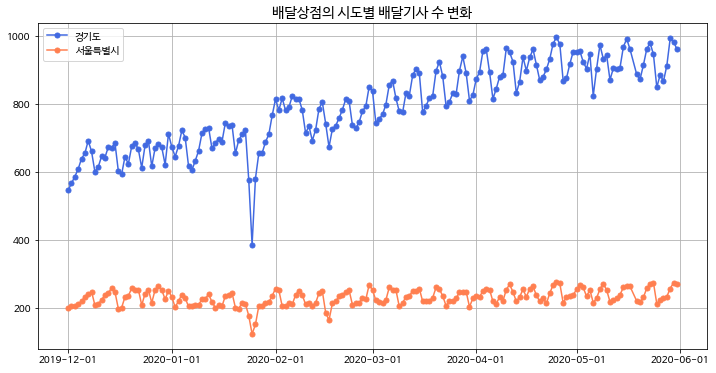

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df_date_dlvr_sido['경기도'], marker='o', ms=5, color='royalblue', label='경기도')
ax.plot(df_date_dlvr_sido['서울특별시'], marker='o', ms=5, color='coral', label='서울특별시')
ax.xaxis.set_major_formatter(xfmt)

ax.set_title('배달상점의 시도별 배달기사 수 변화', fontsize = 14)
ax.legend()
ax.grid()
plt.show()

데이터를 분석하는 과정에서 서울특별시와 경기도에 해당하는 데이터 수가 많았고 이를 통해 해당지역의 배달 라이더 수의 변화에 대해 알아보기로 하였습니다.

- 서로 다른 배달 기사수와 증가폭 : 서울특별시와 경기도의 배달라이더 수의 변화를 살펴본 결과,</br> 경기도의 경우 압도적으로 배달 라이더의 수가 많았고, 증가폭 또한 서울특별시와 비교해보았을 때, 더 큰 증가폭을 보였습니다.


### **3) 지역구별 배달라이더 수의 변화**

In [ ]:
# 지역구별 배달기사 증가 분석(구체화)
# 사회적거리두기 1단계 발령 날짜 : 2020년 3월 1일
# 해당 날짜를 기준으로 지역구별 배달 기사 수에 어떤 변화가 있는지 관찰한다.

dlvr_signgu = df_dlvr_call.copy(...)
dlvr_signgu_seoul = dlvr_signgu[dlvr_signgu['DLVR_DSTN_BRTC_NM'] == '서울특별시']
dlvr_signgu_seoul = dlvr_signgu_seoul.groupby(['DLVR_DSTN_SIGNGU_NM','PROCESS_DT'])['DLVR_MAN_ID'].nunique().reset_index()
dlvr_signgu_seoul['before_after'] = dlvr_signgu_seoul['PROCESS_DT'].apply(lambda x: 'before' if x < pd.to_datetime('2020-03-01') else 'after')


# 코로나 전/후 서울특별시 시군구 평균 배달기사수 시각화
plt.figure(figsize = (12, 8))
plt.title("3월 1일 전후 서울특별시 시 단위 평균 배달 기사수 변화", fontsize = 15)
sns.barplot(x = 'DLVR_DSTN_SIGNGU_NM',
            y = 'DLVR_MAN_ID',
            hue = 'before_after',
            data = dlvr_signgu_seoul,
            ci =None)
plt.legend(loc = 'upper right')
plt.xticks(rotation = 50)
plt.xlabel("지역구", fontsize = 13)
plt.ylabel("평균 배달기사수", fontsize = 13)
plt.show()

서울특별시와 경기도에 대한 심층적분석을 위해 먼저 서울특별시 지역구별 평균 배달 기사수를 분석해보았습니다.</br></br> 코로나19 확진자수가 급증했던 시점인 2020년 03월 01일을 기점으로 지역구별 평균 배달 기사수의 변화를 살펴본 결과</br> 관악구, 구로구, 금천구, 동작구, 양천구, 영등포구에서 평균 배달 기사수가 증가한 것으로 나타났습니다.

In [ ]:
# 경기도 지역에 대해서도 동일한 작업 진행
dlvr_signgu_gyeong = dlvr_signgu[dlvr_signgu['DLVR_DSTN_BRTC_NM'] == '경기도']

dlvr_signgu_gyeong = dlvr_signgu_gyeong.groupby(['DLVR_DSTN_SIGNGU_NM','PROCESS_DT'])['DLVR_MAN_ID'].nunique().reset_index()
dlvr_signgu_gyeong['before_after'] = dlvr_signgu_gyeong['PROCESS_DT'].apply(lambda x: 'before' if x < pd.to_datetime('2020-03-01') else 'after')

plt.figure(figsize = (16, 8))
plt.title("3월 1일 전후 경기도 시/군/구 평균 배달 기사수 변화", fontsize = 15)
sns.barplot(x = 'DLVR_DSTN_SIGNGU_NM',
            y = 'DLVR_MAN_ID',
            hue = 'before_after',
            data = dlvr_signgu_gyeong,
            ci =None)

plt.legend(loc = 'upper right')
plt.xticks(rotation = 50)
plt.xlabel("지역구", fontsize = 13)
plt.ylabel("평균 배달기사수", fontsize = 13)
plt.show()

위와 마찬가지로 경기도 지역구별 평균 배달 라이더 수의 변화를 알아보기 위해 동일한 시점을 기준으로 비교해보았습니다.</br></br>그 결과 광명시, 남양주시, 동두천시, 부천시, 안산시, 상록구, 의정부시, 평택스 등에서 코로나19 확산 이후 평균 배달 라이더수가 증가한 것으로 나타났습니다.</br> 저희는 이러한 사실만을 가지고 코로나19 확산으로 인해 배달 라이더의 수가 증가했다고 단정짓기는 어렵다고 생각하였습니다.

### **4) 배달라이더 수와 배달주문량**

In [ ]:
# 배달 주문량과 배달 기사의 수에 대한 상관관계 분석
df_date_dlvr = dlvr_call_day_cycle.groupby(['PROCESS_DT'])['DLVR_MAN_ID'].agg(['count', 'nunique'])
df_date_dlvr

In [ ]:
# 시각화를 통한 배달 주문량과 배달 기사의 수 비교
xfmt = md.DateFormatter('%Y-%m-%d')

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(df_date_dlvr['count'], marker='o', ms=5, color='royalblue', label='DLVR_ORDER')
ax1.xaxis.set_major_formatter(xfmt)
ax1.set_ylabel('DLVR_ORDER_COUNT')
ax1.set_ylim(0, 65000, 5000)
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(df_date_dlvr['nunique'], marker='o', ms=5, color='coral', label='DLVR_MAN')
ax2.xaxis.set_major_formatter(xfmt)
ax2.set_xlabel('Date')
ax2.set_ylabel('DLVR_MAN_COUNT')
ax2.set_ylim(400, 1700, 100)

fig.legend(loc = 'upper center')
plt.show()

In [ ]:
# 상관계수 분석(pearson)
df_date_dlvr.corr(method = 'pearson')

배달 주문량이 증가함에 따라 배달 라이더의 수에는 어떠한 변화가 있는지 알아보기 위해 상관관계 분석을 진행해본 결과,</br> '배달 주문량'과 '배달 라이더의 수' 이 두 가지 요소 간 상관관계는 약 0.62로 양의 상관관계가 나타났습니다.</br> 이는 배달주문량의 증가가 어느 정도 배달 라이더 수 증가에 영향을 미치는 요인이라고 볼 수 있습니다.

## 2-3. 배달 라이더 수익 분석

### **1) 배달요청업체 할당량**

배달요청업체 할당량을 살펴본 결과</br>한 명의 배달기사가 여러 배달업체로부터 배달 요청을 받는 경우가 나타났습니다.

In [ ]:
df_dlvr_call.replace(r'\N', np.nan, inplace=True)
df_entp = df_dlvr_call.groupby(['DLVR_MAN_ID', 'PROCESS_DT'])['DLVR_REQUST_ENTRPS_ID'].nunique().rename('ENTRPS_COUNT').reset_index()
df_entp

In [ ]:
df_entp.describe(include='all')

배달 라이더들에게 할당되는 배달 요청업체의 수를 알아본 결과,</br> 
- 배달 접수 업체 : 0개 또는 1개
- 배달 요청 업체 : 최소 1개에서 많은 경우는 10개로 => 평균 2.4개의 배달업체가 할당됨



In [ ]:
df_entp['before_after'] = pd.to_datetime(df_entp['PROCESS_DT']).apply(lambda x: 'before' if x < datetime(2020,3,1) else 'after')
df_entp

In [ ]:
idx1 = df_entp['ENTRPS_COUNT']>1
idx2 = df_entp['before_after']=='before'

before_ratio = df_entp[idx1&idx2]['DLVR_MAN_ID'].nuniique() / df_entp[idx2]['DLVR_MAN_ID'].nunique()
after_ratio = df_entp[idx1&~idx2]['DLVR_MAN_ID'].nunique() / df_entp[~idx2]['DLVR_MAN_ID'].nunique()

In [ ]:
before_ratio, after_ratio

코로나19 확산을 기점으로 배달 라이더에게 할당되는 배달 요청업체 할당량의 변화를 알아본 결과 다음과 같은 사실을 알 수 있었습니다.
- 다수의 업체로부터 콜을 받는 배달 라이더의 비율 약 65%
- 코로나19 확산 이후에도 변화가 그리 크지 않음

저희는 이러한 사실을 토대로 배달 서비스가 이미 문화로 정착되었기 때문에 코로나19 확산이 배달산업성장에 그다지 큰 영향을 미치지는 않았다고 결론을 내릴 수 있었습니다. 

### **2) 배달시간, 배달금액, 상품금액**

In [ ]:
# 배달시간, 배달금액, 상품금액간 상관관계

dlvr_call_req = df_dlvr_call[df_dlvr_call['DLVR_REQUST_STTUS_VALUE'] == 1]
dlvr_call_req.replace(r'\N', np.nan, inplace = True)

dlvr_call_req['DLVR_CARALC_TIME'] = pd.to_datetime(dlvr_call_req['DLVR_CARALC_TIME'])
dlvr_call_req['DLVR_COMPT_TIME'] = pd.to_datetime(dlvr_call_req['DLVR_COMPT_TIME'])

dlvr_call_req['DLVR_TIME'] = (dlvr_call_req['DLVR_COMPT_TIME'] - dlvr_call_req['DLVR_CARALC_TIME']).dt.seconds//60
output.clear()
dlvr_call_req[['DLVR_AMOUNT','GOODS_AMOUNT', 'DLVR_TIME']].corr()

데이터 분석의 과정에서 배달금액의 경우 평균 배달금액보다 높게 측정된 경우와 배달 금액이 너무 낮게 측정이 되는 경우를 발견할 수 있었습니다.</br> 혹여나 상품금액, 배달시간에 따라서 배달금액이 측정되고 있는건 아닌지 알아보기 위해 배달금액, 상품금액, 배달시간 간의 상관관계 분석을 진행해보았습니다.

분석결과 어떠한 3가지 요소 간에는 어떠한 상관관계도 발견할 수 없었습니다.

### 3) 사회적 거리두기에 따른 평균 배달금액

In [ ]:
# 배달기사 평균 하루 한건당 받는 배달 금액

dlvr_call_rider_fee = df_dlvr_call.groupby(['PROCESS_DT', 'DLVR_MAN_ID'])['DLVR_AMOUNT'].agg(['count', 'sum', 'mean']).reset_index()
dlvr_call_rider_fee_avg = dlvr_call_rider_fee.groupby(['PROCESS_DT'])['mean'].mean().reset_index()
dlvr_call_rider_fee_avg

In [ ]:
# 배달기사 날짜별 한 건당 수익의 변화
# 각 배달기사별 날짜에 따른 배달 횟수와 배달 금액의 평균값 추가
dlvr_call_rider_fee = df_dlvr_call.groupby(['PROCESS_DT', 'DLVR_MAN_ID'])['DLVR_AMOUNT'].agg(['count', 'sum', 'mean']).reset_index()

# 배달기사 평균 하루 한건당 받는 배달 금액
dlvr_call_rider_fee_avg = dlvr_call_rider_fee.groupby(['PROCESS_DT'])['mean'].mean().reset_index()

plt.figure(5, figsize = (14, 8))
plt.title("일자별 배달기사 평균 배달 금액(1건 기준)", fontsize = 15)
plt.plot(dlvr_call_rider_fee_avg['PROCESS_DT'], dlvr_call_rider_fee_avg['mean'], marker = 'o', color = 'royalblue', label = "평균 배달금액")

# 사회적 거리두기에 따른 배달 주문량 확인
groupby_gov_policy = df_Policy.groupby(by = ['gov_policy'])
social_distancing_campaign = groupby_gov_policy.get_group('Social Distancing Campaign')

color_list = ['r','g','b','k']

plt.figure(5)
for i, start_date in enumerate(social_distancing_campaign['start_date']):
    detail = social_distancing_campaign['detail'].iloc[i]
    plt.axvline(x = pd.to_datetime(start_date), c = color_list[i], linestyle = '--', linewidth = 2, label = 'Social Distancing Campaign - ' + detail)


# 사회적 거리두기 이전 배달 금액의 피크값 인덱스 추출
idx_peak = np.argmax(dlvr_call_rider_fee_avg['mean'].values)
date_peak = dlvr_call_rider_fee_avg['PROCESS_DT'].iloc[idx_peak]
plt.axvline(x = date_peak, c = 'violet', linestyle = '--', linewidth = 2, label = '연휴(설날) 시작일')

plt.xlabel("일자", fontsize = 13)
plt.ylabel("배달금액(평균, 단위 : 원)", fontsize = 13)
plt.ylim(3400, 4300)
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# 배달 업종별 배달 금액 boxplot
dlvr_call_amount_compare = dlvr_call_amount.copy(...)
dlvr_call_amount_compare['before_after']  = dlvr_call_amount_compare.PROCESS_DT.apply(lambda x: 'before' if x < datetime(2020,3,1) else 'after')

plt.figure(figsize = (16, 8))
plt.title("배달 업종별 배달 금액(사회적 거리두기 전후 비교)", fontsize = 15)
sns.boxplot(x = 'DLVR_STORE_INDUTY_NM', y = 'DLVR_AMOUNT', hue = 'before_after', data = dlvr_call_amount_compare)
plt.xlabel("업종", fontsize = 13)
plt.ylabel("배달 금액(단위 : 원)", fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylim(0, 20000)
plt.legend()
plt.show()

배달 라이더들과 관련된 분석을 진행해오면서</br>
이번 대회의 두 번째 목표였던 배달 라이더의 실상에 대해 알아보기 위해 배달 라이더의 수익에 대한 분석을 진행해보기로 하였습니다.

우선 배달 라이더들의 하루 평균 배달 금액 알아보았습니다.
- 하루 평균 배달금액 : 3600원 - 3800원
- 2020년 01월 25일 급증하는 하루 평균 배달금액 : 해당 시점은 설날 연휴로 배달라이더들에게 연휴수당이 지급되어 평소보다 높은 배달금액이 발생한 것으로 추측해볼 수 있습니다.
- 사회적 거리두기에 따른 하루 평균 건당 배달 금액 : 분석에 앞서 사회적 거리두기 단계가 강화된 시점에 배달 금액이 인상되었을 거라 예측하였지만, 실제 분석 결과, 사회적 거리두기가 강화된 시점과 완화된 시점을 비교해보았을 때 그리 큰 차이가 나타나지는 않았습니다.

### 4) 배달 라이더의 수익 측정

In [ ]:
# 날짜별 배달기사의 평균 수익
# 배달기사 날짜별 한 건당 수익의 변화
# 각 배달기사별 날짜에 따른 배달 횟수와 배달 금액의 평균값 추가
dlvr_call_rider_income = df_dlvr_call.groupby(['PROCESS_DT', 'DLVR_MAN_ID'])['DLVR_AMOUNT'].agg(['count', 'sum', 'mean']).reset_index()

# 배달기사 평균 하루 한건당 받는 배달 금액
dlvr_call_rider_income_avg = dlvr_call_rider_income.groupby(['PROCESS_DT'])['sum'].mean().reset_index()

plt.figure(5, figsize = (14, 8))
plt.title("일자별 배달기사 평균 배달 수익", fontsize = 15)
plt.plot(dlvr_call_rider_income_avg['PROCESS_DT'], dlvr_call_rider_income_avg['sum'], marker = 'o', color = 'royalblue', label = "평균 배달수익(1일)")

# 사회적 거리두기에 따른 배달 주문량 확인
groupby_gov_policy = df_Policy.groupby(by = ['gov_policy'])
social_distancing_campaign = groupby_gov_policy.get_group('Social Distancing Campaign')

color_list = ['r','g','b','k']

plt.figure(5)
for i, start_date in enumerate(social_distancing_campaign['start_date']):
    detail = social_distancing_campaign['detail'].iloc[i]
    plt.axvline(x = pd.to_datetime(start_date), c = color_list[i], linestyle = '--', linewidth = 2, label = 'Social Distancing Campaign - ' + detail)

plt.xlabel("일자", fontsize = 13)
plt.ylabel("배달수익(하루 평균, 단위 : 원)", fontsize = 13)
plt.legend(loc = 'upper right')
plt.show()

그렇다면 일자별로 배달 라이더의 평균 배달수익은 어떠한지 알아보았습니다. 분석결과 다음과 같은 결과를 얻을 수 있었습니다.

- 2020년 01월을 기점으로 평균 배달 수익이 증가 : 앞서 살펴보았던 평균 배달금액에서는 별다른 차이가 없었지만, 해당 시점이 연말과 연초인 만큼 배달 건수 자체가 증가함에 따라 평소 평균 배달 수익보다는 높은 배달 수익을 창출했다고 볼 수 있습니다.
- 2020년 03월 01일 배달 라이더 평균 배달 수익 급증 : 해당 시점은 코로나19 확진자수가 급증했던 시점인 동시에 정부의 사회적 거리두기 방침 또한 강화된 시점입니다. 해당 시기에 사람들은 코로나19 초기 발현에 대한 경각심으로 인해 사회적 거리두기에 적극적으로 참여하면서 평소보다 배달서비스를 더 많이 이용하게 되었고 이는 결과적으로 평균 배달 수익의 증가를 가져왔다고 볼 수 있습니다.
- 사회적거리두기에 따른 평균 배달 수익의 증가가 나타나지는 않음 : 2020년 03월 01일 이후 시점을 살펴보았을 때, 사회적 거리두기에 따른 평균 배달 수익의 변화 패턴을 발견할 수 없었습니다. 이러한 현상은 시간이 경과됨에 따라 사람들이 사회적 거리두기와는 별개로 배달서비를 이용하는 것으로 추측해볼 수 있습니다.

In [ ]:
# 배달 소요시간과 배달 금액의 관계를 그래프로 시각화
dlvr_time_amount = dlvr_call_req[['DLVR_AMOUNT', 'DLVR_TIME']]
dlvr_time_amount = dlvr_time_amount[(dlvr_time_amount['DLVR_AMOUNT'] <= 20000) & (dlvr_time_amount['DLVR_TIME'] <= 180)]

dlvr_amount_max = np.max(dlvr_time_amount['DLVR_AMOUNT'].values)
dlvr_amount_min = np.min(dlvr_time_amount['DLVR_AMOUNT'].values)

num_bins = 1000
dlvr_amount_bins = np.arange(dlvr_amount_min, dlvr_amount_max, num_bins)
d_range_list = []
dlvr_time_dist_interval_list = []
dlvr_time_dist_mean_list = [0]

for i in range(len(dlvr_amount_bins) - 1):
    xl = dlvr_amount_bins[i]
    xr = dlvr_amount_bins[i+1]
    d_range = str(xl) + "원 - " + str(xr) + "원"
    d_range_list.append(d_range)
    dlvr_time_dist_interval = dlvr_time_amount[(dlvr_time_amount['DLVR_AMOUNT'] >= xl) & (dlvr_time_amount['DLVR_AMOUNT'] < xr)].DLVR_TIME.values
    dlvr_time_dist_interval_list.append(dlvr_time_dist_interval)
    dlvr_time_dist_mean_list.append(dlvr_time_dist_interval.mean())

time_amount_data = [d_range_list, dlvr_time_dist_interval_list]
plt.figure(6, figsize = (14,6))
plt.title("배달 소요시간과 배달 금액", fontsize = 15)
plt.xlabel("배달 금액(단위: 원)", fontsize = 13)
plt.ylabel("배달 소요시간(단위: 분)", fontsize = 13)
plt.xticks(np.arange(1,20,1).tolist(), d_range_list, rotation = 45)
#plt.boxplot(dlvr_time_dist_interval_list, notch = True, vert = True, whis = 1.5)
plt.violinplot(dlvr_time_dist_interval_list, positions = np.arange(1,20,1).tolist(), showmeans=True)
plt.plot(dlvr_time_dist_mean_list,label = '배달금액대별 소요시간 평균', marker = 'o', color = 'r')
plt.legend()
output.clear()
plt.show()

NameError: ignored

In [ ]:
dlvr_call_req[['DLVR_AMOUNT', 'DLVR_TIME']].describe()

,DLVR_AMOUNT,DLVR_TIME
count,4.220992e+06,4.220461e+06
mean,3.661556e+03,2.134697e+01
std,7.380237e+02,2.396485e+01
min,0.000000e+00,0.000000e+00
25%,3.300000e+03,1.400000e+01
50%,3.500000e+03,1.900000e+01
75%,3.800000e+03,2.500000e+01
max,1.055000e+05,1.378000e+03


더 정밀한 배달라이더의 수익 분석 진행을 위해 '배달금액대','배달소요시간', '배달금액대별 소요시간 평균'을 산출하였습니다. 산출된 결과를 이용해 현실적인 배달 라이더의 수익을 산출해낼 수 있었습니다.

- 배달 라이더의 평균 시속 : 100km(기사 기준)
- 평균 건당 배달 금액 : 3500원(분석 결과 기준)
- 가장 높게 측정된 배달금액 : 18000원대
- 평균 배달 소요 시간 : 30분
- 거리별 할증 : 1.5km 초과시 100m 당 100원

결과적으로 배달 라이더가 얻을 수 있는 수익은 최소 4000원 최대 18000원대라고 볼 수 있습니다. 이를 토대로 언론에서 보도되고 있는 "연봉 1억대의 배달라이더"가 되기 위해서는 하루 90건에서 100건의 배달을 해야만이 가능하다는 결과를 도출할 수 있습니다. 


# 3. 결론 



### 3-1. 코로나19와 배달산업의 관계




> 예상과 달리 배달 산업의 성장은 코로나19의 지속적인 영향을 받지 않은 것으로 볼 수 있습니다. 오히려 코로나19의 영향보다는 배달 문화가 하나의 문화로 정착되었으며, 그로 인해 코로나19 확진자수의 일시적 영향을 받은 이후, 별개로 지속적인 성장을 하고 있다는 것을 알 수 있습니다.



### 3-2. 배달라이더의 실상


> 배달콜 경쟁</br>
- 다수의 콜을 할당받지 못하는 40% 정도의 배달 라이더 : 배달 라이더들 간 배달콜을 잡기 위한 과도한 경쟁이 나타날 수 있습니다. 

> 수익을 위한 속도경쟁</br>
- 다수의 콜을 할당받는 65%의 배달 라이더 : '많은' 배달 주문량을 '재빨리' 소화하기 위해서는 빠른 속력으로 오토바이를 운전해야 합니다.
- 배달 라이더가 생계수단인 분들의 경우 하루에 많은 배달을 해야만 수익을 낼 수 있기 때문에 오토바이를 빨리 운전하게 됩니다.
- 실제로 이러한 이유로 배달 라이더들의 사고가 증가하고 있는 것을 알 수 있습니다. 도로교통공사 데이터를 근간으로 살펴봤을 때, 서울, 경기 지역의 이륜차 사고 건수의 증가를 살펴볼 수 있습니다.




201912  202001  202002  202003  202004  202005
시도 구분                                                  
경기 부상자수     420     351     346     380     449     464
   사고건수     318     263     288     276     339     338
   사망자수       5       8       4      11       9      13
서울 부상자수     331     335     409     364     416     442
   사고건수     273     271     326     289     322     349
   사망자수       5       2       6       4       2       9

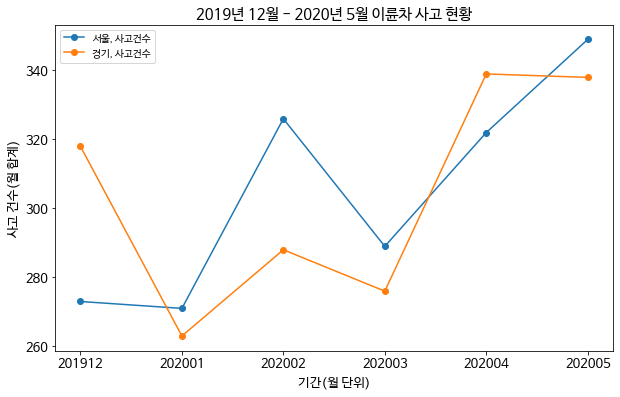

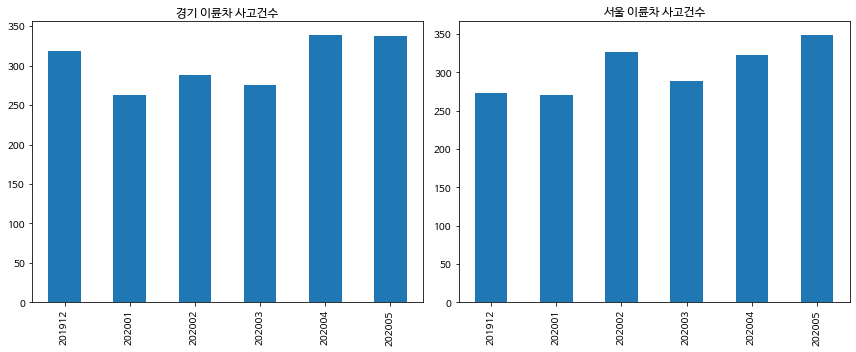

In [ ]:
# 연간 오토바이 사고 발생 건수(이륜차 사고, 도로교통공사 TAAS 참고)
accident_path = '/content/drive/MyDrive/2021_데이터분석스터디/DACON_2021빅데이터통신플랫폼경진대회/accident_pre.csv'
df_accident = pd.read_csv(accident_path)
df_accident_group = df_accident.groupby(['시도', '구분'])[['201912', '202001', '202002', '202003', '202004', '202005']].sum()

display(df_accident_group)

# line graph plot
plt.figure(1, figsize = (10,6))
plt.plot(df_accident_group.loc['서울', '사고건수'], marker = 'o', label = '서울, 사고건수')
plt.plot(df_accident_group.loc['경기', '사고건수'], marker = 'o', label = '경기, 사고건수')
plt.title("2019년 12월 - 2020년 5월 이륜차 사고 현황", fontsize = 15)
plt.xlabel('기간(월 단위)', fontsize = 13)
plt.xticks(fontsize = 13)
plt.ylabel('사고 건수(월 합계)', fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend()
plt.show()
print('\n\n')

# bar plot
fig, axs = plt.subplots(figsize=(12,5), ncols=2)
df_accident_group.loc['경기', '사고건수'].plot.bar(ax=axs[0])
df_accident_group.loc['서울', '사고건수'].plot.bar(ax=axs[1])
axs[0].set_title('경기 이륜차 사고건수')
axs[1].set_title('서울 이륜차 사고건수')

plt.tight_layout()
plt.show()

지금까지의 분석결과를 토대로 정리해보면 

- 코로나19와는 별개로 성장하고 있는 배달 산업에서 배달 라이더들은 늘 교통사고 위험에 노출되어 있다고 볼 수 있습니다.
- 배달 플랫폼의 수익구조에 의해서 주어진 시간에 얼마나 많은 배달을 하느냐가가 고수익을 결정짓다보니 오토바이 속도 위반은 생존전략이 되고 있습니다.
- 하지만 오히려 배달 플랫폼 회사에서는 늘어나는 주문량을 소화하기 위해 각종 프로모션을 이용해 배달 라이더들의 속도 경쟁을 부추기는 것을 나타났습니다.
- 이번 데이터 분석을 통해, 앞으로는 배달 산업의 성장과 동시에 배달 산업에 기여를 하고 있는 배달라이더에 대한 처우에 대한 개선이 필요함을 시사해주는 바 입니다. 

### 3-3. 한계점 및 아쉬운 점


> 데이터의 한계</br>
- 데이터의 날짜 범주가 2019년 12월부터 2020년 5월까지로 이루어져, 코로나19로 인한 배달 산업의 성장에 대한 명확한 파악이 힘들었습니다.
- 1년 이상의 데이터를 제공받았을 경우, 시계열 관점에서의 추세/계절성/순환 등 다양한 관점에서 데이터 분석이 가능했을거라 생각이 듭니다.
- 2020년 05월까지 대부분의 코로나 확진은 대구에서 발생하였다. 이로 인해 서울과 경기 지역에는 직접적으로 영향을 미치지 않아, 배달음식 데이터에 미미하게 반영된 것으로 보인다.

